In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns
import xarray as xr
import xgcm
import pop_tools

In [2]:
ds = xr.open_dataset("/data3/dxl/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0313-09.nc")
ds

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 2400, nlon: 3600, time: 1, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                (time) object 0313-10-01 00:00:00
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                 (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
    ULONG               (nlat, nlon) float64 ...
    ULAT                (nlat, nlon) float64 ...
    TLONG               (nlat, nlon) float64 ...
    TLAT                (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/87)
    time_bound          (time, d2) object ...
    dz                  (z_t) float32 ...
    dzw                 (z_w) float32 ...
    KMT                 (nlat, nlon) float64 ...
    KMU                 (nlat, nlon) float64 ...
    REGION_MASK         (nlat, nlon) float64 ...
    ...                  ...
    HMXL                (time, nlat, nlon) float32 ...
    XMXL                (time, nlat, nlon) float32 ...
    TMXL                (time, nlat, nlon) float32 ...
    HBLT                (time, nlat, nlon) float32 ...
    XBLT                (time, nlat, nlon) float32 ...
    TBLT                (time, nlat, nlon) float32 ...
Attributes:
    title:           B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2019-11-04 at 00:40:42.6
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    66676259
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0

In [3]:
data222=nc.Dataset("/data3/dxl/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0313-08.nc")
TLONG222 = data222.variables['TLONG'][:480,:]
TLAT222 = data222.variables['TLAT'][:480,:]
TLONG222[TLONG222==-1] = np.nan
TLAT222[TLAT222==-1] = np.nan
ULONG222 = data222.variables['ULONG'][:480,:]
ULAT222 = data222.variables['ULAT'][:480,:]
ULONG222[ULONG222==-1] = np.nan
ULAT222[ULAT222==-1] = np.nan

UET = data222.variables['UET'][:480,:]
VNT = data222.variables['VNT'][:480,:]

In [4]:
UET.shape

(1, 62, 2400, 3600)

In [5]:
data222=xr.open_dataset("/data3/dxl/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0313-08.nc")
VVEL = data222['VVEL'][0,:,:]
KMU= data222['KMU'][:480,:] ## k Index of Deepest Grid Cell on U Grid
HU= data222['HU'][:480,:] ## water depth on U grid, cm
HT= data222['HT'][:,:] ## water depth on T grid, cm
SSH= data222['SSH'][:,:]
DXU= data222['DXU'][:,:] ## cm
DYT= data222['DYT'][:,:] ## cm

UVEL = data222['UVEL'][0,:,:]
tlat = data222['TLAT'][:,700]
tlon = data222['TLONG'][478,:]

#nlat = data222['nlat']
ulat = data222['ULAT'][:,700]
ulon = data222['ULONG'][478,:]

# ZZZ in m

In [6]:
HU

<xarray.DataArray 'HU' (nlat: 480, nlon: 3600)>
[1728000 values with dtype=float64]
Coordinates:
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:  ocean depth at U points
    units:      centimeter

In [7]:
data222.z_t/100

<xarray.DataArray 'z_t' (z_t: 62)>
array([5.0000000e+00, 1.5000000e+01, 2.5000000e+01, 3.5000000e+01,
       4.5000000e+01, 5.5000000e+01, 6.5000000e+01, 7.5000000e+01,
       8.5000000e+01, 9.5000000e+01, 1.0500000e+02, 1.1500000e+02,
       1.2500000e+02, 1.3500000e+02, 1.4500000e+02, 1.5500000e+02,
       1.6509840e+02, 1.7547905e+02, 1.8629128e+02, 1.9766028e+02,
       2.0971138e+02, 2.2257828e+02, 2.3640883e+02, 2.5137016e+02,
       2.6765421e+02, 2.8548364e+02, 3.0511923e+02, 3.2686798e+02,
       3.5109348e+02, 3.7822763e+02, 4.0878464e+02, 4.4337769e+02,
       4.8273672e+02, 5.2772803e+02, 5.7937286e+02, 6.3886261e+02,
       7.0756329e+02, 7.8700250e+02, 8.7882526e+02, 9.8470587e+02,
       1.1062042e+03, 1.2445669e+03, 1.4004972e+03, 1.5739464e+03,
       1.7640033e+03, 1.9689442e+03, 2.1864565e+03, 2.4139717e+03,
       2.6490012e+03, 2.8893848e+03, 3.1334048e+03, 3.3797935e+03,
       3.6276704e+03, 3.8764519e+03, 4.1257681e+03, 4.3753926e+03,
       4.6251904e+03, 4.8750835e+03, 5.1250283e+03, 5.3750000e+03,
       5.6249907e+03, 5.8749907e+03], dtype=float32)
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05

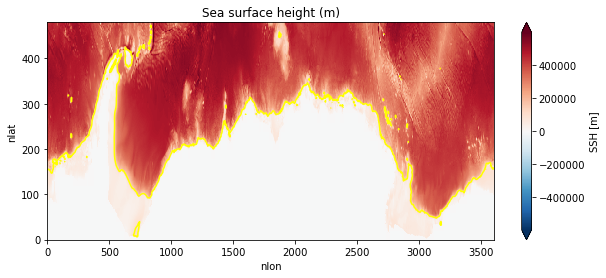

In [8]:
fig = plt.figure(figsize = (10, 4))
HU.plot(extend='both', cbar_kwargs={'label': "SSH [m]"})
HU.plot.contour(levels = [100000],colors = 'yellow', linestyles = '-')
plt.title('Sea surface height (m)');

In [9]:
np.nanmax(KMU)

62.0

In [10]:
# Fill in land with zeros:
KMU = KMU.fillna(0)

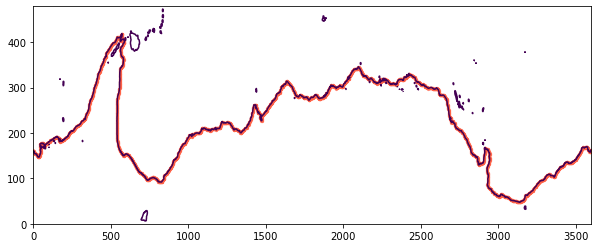

In [11]:
fig = plt.figure(figsize = (10, 4))
count = 0
x_contour = []
y_contour = []

# Create the contour:
sc = plt.contour(KMU, levels=[40])
for collection in sc.collections:
    for path in collection.get_paths():
        #print(path)
        count += 1
        #print(count)
        if count ==  1:
            # Write down the lat/lon indices
            for ii in range(np.size(path.vertices[:,0])):
                x_contour.append(int(np.round(path.vertices[ii][0])))
                y_contour.append(int(np.round(path.vertices[ii][1])))

plt.scatter(x_contour, y_contour, s=5, alpha=0.5, color='tomato');

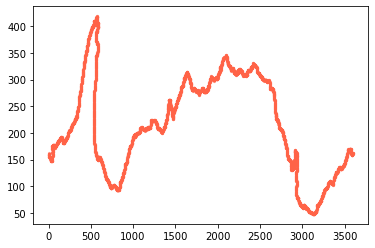

In [12]:
plt.scatter(x_contour, y_contour, s=5, alpha=0.5, color='tomato')

In [13]:
len(x_contour)

4692

In [14]:
len(y_contour)

4692

In [15]:
# Difference between two neighbouring indices
diff_x_contour = np.diff(x_contour)
diff_y_contour = np.diff(y_contour)

# Get a list with the indices of duplicates
diff_ind = []
for ii in range(len(diff_x_contour)):
    if (diff_x_contour[ii]==0) and (diff_y_contour[ii]==0):
        diff_ind.append(ii)

In [16]:
# Now remove the indices (start from the end so the indices don't shift)
for ii in range(len(diff_ind)):
    index = diff_ind[::-1][ii]
    del x_contour[index]
    del y_contour[index]

In [17]:
len(y_contour)

4410

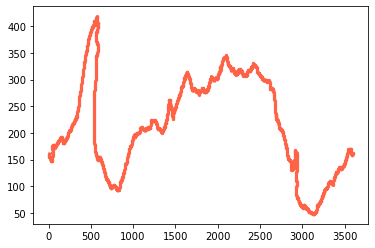

In [18]:
plt.scatter(x_contour, y_contour, s=5, alpha=0.5, color='tomato')

In [19]:
import os

file_name = 'lonlat'
outfile   = os.path.join(file_name+'.npz')

np.savez(outfile, lon_along_contour=x_contour, lat_along_contour=y_contour,num_points=4410 )

In [20]:
KMU_contour = np.zeros(len(x_contour))

for ii in range(len(KMU_contour)):
    KMU_contour[ii] = KMU[y_contour[ii], x_contour[ii]]

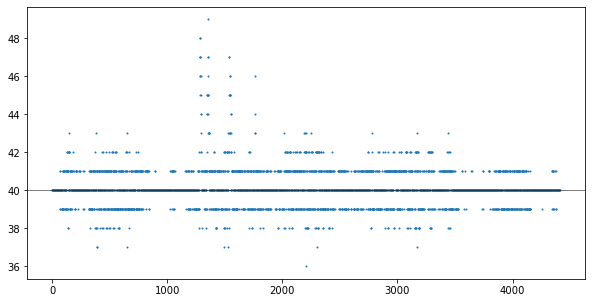

In [21]:
fig = plt.figure(figsize=(10, 5))

plt.plot(KMU_contour, 'o', markersize=1)
plt.axhline(40, color='k', linewidth=0.5);

In [22]:
len(KMU_contour)

4410

In [23]:
lat_along_contour = np.zeros((len(x_contour)))
lon_along_contour = np.zeros((len(x_contour)))

for ii in range(len(KMU_contour)):
    lon_along_contour[ii] = tlon[x_contour[ii]]
    lat_along_contour[ii] = tlat[y_contour[ii]]

In [24]:
len(lat_along_contour)

4410

In [25]:
lat_along_contour = np.append(lat_along_contour, lat_along_contour[0])
lon_along_contour = np.append(lon_along_contour, lon_along_contour[0])

In [26]:
lat_along_contour[0]

-71.62644744493164

In [27]:
import os

file_name = 'lonlat222'
outfile   = os.path.join(file_name+'.npz')

np.savez(outfile, lon_along_contour222=lon_along_contour, lat_along_contour222=lon_along_contour )

In [28]:
len(lat_along_contour)

4411

In [29]:
len(KMU_contour)

4410

In [30]:
# Number of grid points on the contour
num_points = len(lat_along_contour)

In [31]:
num_points

4411

In [32]:
contour_mask_numbered = np.zeros_like(lon_along_contour)

for ii in range(num_points-1):
    lat1 = lat_along_contour[ii]
    lat2 = lat_along_contour[ii+1]
    lon1 = lon_along_contour[ii]
    lon2 = lon_along_contour[ii+1]
    contour_mask_numbered[ii] = ii

In [33]:
contour_mask_numbered.shape

(4411,)

In [34]:
contour_mask_numbered

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.408e+03, 4.409e+03,
       0.000e+00])

In [35]:
contour_mask = KMU*0

for ii in range(num_points-1):
    contour_mask[y_contour[ii], x_contour[ii]] = contour_mask_numbered[ii]+1

In [36]:
len(x_contour) # 4410 points

4410

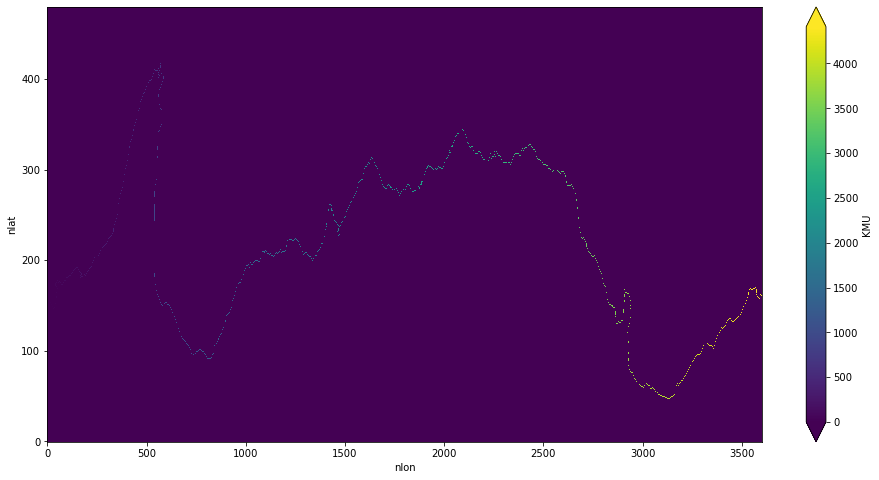

In [37]:
plt.figure(1, figsize=(16, 8))
contour_mask.plot(extend='both');

In [38]:
len(TLAT222[1])

3600

In [39]:
len(TLONG222)

480

In [40]:
mask_value = -1000
contour_mask_numbered = contour_mask

# fill in points to south of contour:
contour_masked_above = np.copy(contour_mask_numbered)
contour_masked_above[-1, 0] = mask_value


# from top left:
for ii in range(len(TLAT222[1])-1):
    for jj in range(len(TLONG222))[::-1][:-1]:
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj-1, ii] == 0:
                contour_masked_above[jj-1, ii] = mask_value
            if contour_masked_above[jj, ii+1] == 0:
                contour_masked_above[jj, ii+1] = mask_value

#from top right:
for ii in range(len(TLAT222[1]))[::-1][:-1]:
    for jj in range(len(TLONG222))[::-1][:-1]:
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj-1, ii] == 0:
                contour_masked_above[jj-1, ii] = mask_value
            if contour_masked_above[jj, ii-1] == 0:
                contour_masked_above[jj, ii-1] = mask_value

# from bottom right:
for ii in range(len(TLAT222[1]))[::-1][:-1]:
    for jj in range(len(TLONG222)-1):
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj+1, ii] == 0:
                contour_masked_above[jj+1, ii] = mask_value
            if contour_masked_above[jj, ii-1] == 0:
                contour_masked_above[jj, ii-1] = mask_value

#from bottom left:
for ii in range(len(TLAT222[1])-1):
    for jj in range(len(TLONG222)-1):
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj+1, ii] == 0:
                contour_masked_above[jj+1, ii] = mask_value
            if contour_masked_above[jj, ii+1] == 0:
                contour_masked_above[jj, ii+1] = mask_value

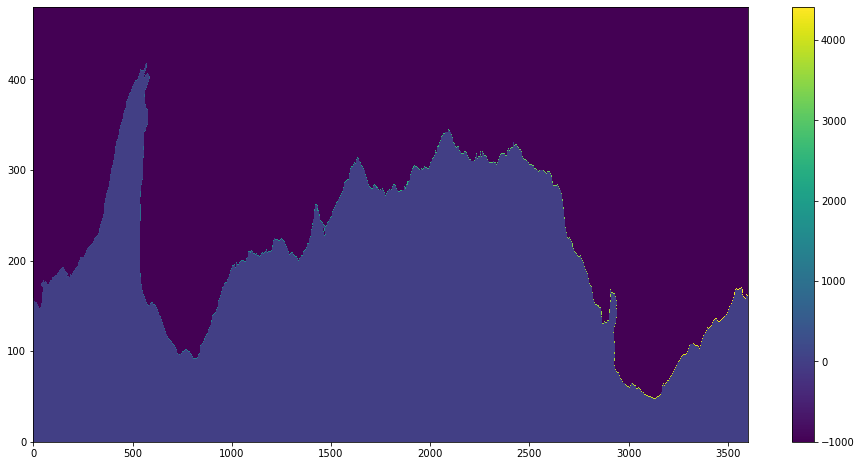

In [41]:
plt.figure(1, figsize=(16, 8))

plt.pcolormesh(contour_masked_above)
plt.colorbar();

In [42]:
contour_mask_numbered.shape

(480, 3600)

In [43]:
contour_masked_above[:1200,480]

array([   -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,
          -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,
          -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,
          -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,
          -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,
          -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,
          -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,
          -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,
          -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,
          -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,    -0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
      

In [44]:
#mask_y_transport[:1200,480]

In [45]:
contour_mask_numbered.shape

(480, 3600)

In [46]:
np.where(contour_mask_numbered==4000)[1]

array([3197])

In [47]:
np.where(contour_mask_numbered==4000)[0]

array([68])

In [48]:
mask_x_transport = np.zeros_like(contour_mask_numbered)
mask_y_transport = np.zeros_like(contour_mask_numbered)

mask_y_transport_numbered = np.zeros_like(contour_mask_numbered)
mask_x_transport_numbered = np.zeros_like(contour_mask_numbered)

mask_y_transport_loc1 = []
mask_y_transport_loc2 = []
mask_x_transport_loc1 = []
mask_x_transport_loc2 = []



# make halos:
shape = contour_masked_above.shape
contour_masked_above_halo = np.zeros((shape[0], shape[1]+2))
contour_masked_above_halo[:, 0] = contour_masked_above[:, -1]
contour_masked_above_halo[:, 1:-1] = contour_masked_above
contour_masked_above_halo[:, -1] = contour_masked_above[:, 0]

new_number_count = 1
for mask_loc in range(1, int(np.max(contour_mask_numbered))+1):
    #if mask_loc%100 == 0:
    #    print('mask for x/y transport at point '+str(mask_loc))
    index_i = np.where(contour_mask_numbered==mask_loc)[1]
    index_j = np.where(contour_mask_numbered==mask_loc)[0]
    # if point above is towards Antarctica and point below is away from Antarctica:
    # take transport grid point to north of t grid:
    if (contour_masked_above[index_j+1, index_i]==0) and (contour_masked_above[index_j-1, index_i]!=0):
        mask_y_transport[index_j, index_i] = -1
        #mask_y_transport_loc1.append(tlat[index_j])
        #mask_y_transport_loc2.append(tlon[index_i])
        # important to do
        mask_y_transport_numbered[index_j, index_i] = new_number_count
        new_number_count += 1
    # if point below is towards Antarctica and point above is away from Antarctica:
    # take transport grid point to south of t grid:
    elif (contour_masked_above[index_j-1, index_i]==0) and (contour_masked_above[index_j+1, index_i]!=0):
        mask_y_transport[index_j-1, index_i] = 1
        #mask_y_transport_loc1.append(tlat[index_j-1])
        #mask_y_transport_loc2.append(tlon[index_i])
        mask_y_transport_numbered[index_j-1, index_i] = new_number_count
        new_number_count += 1
        
        # if point below and point above are BOTH towards Antarctica:
    # take transport grid point to south of t grid:
    elif (contour_masked_above[index_j-1, index_i]==0) and (contour_masked_above[index_j+1, index_i]==0):
        mask_y_transport[index_j-1, index_i] = 1
        #mask_y_transport_loc1.append(tlat[index_j-1])
        #mask_y_transport_loc2.append(tlon[index_i])
        
        mask_y_transport[index_j, index_i] = -1
        #mask_y_transport_loc1.append(tlat[index_j])
        #mask_y_transport_loc2.append(tlon[index_i])
        mask_y_transport_numbered[index_j-1, index_i] = new_number_count
        mask_y_transport_numbered[index_j, index_i] = new_number_count+1
        new_number_count += 2
    # if point to right is towards Antarctica and point to left is away from Antarctica:
    # zonal indices increased by 1 due to halos
    # take transport grid point on right of t grid:
    if (contour_masked_above_halo[index_j, index_i+2]==0) and (contour_masked_above_halo[index_j, index_i]!=0):
        mask_x_transport[index_j, index_i] = -1
        #mask_x_transport_loc1.append(tlat[index_j])
        #mask_x_transport_loc2.append(tlon[index_i])
        mask_x_transport_numbered[index_j, index_i] = new_number_count
        new_number_count += 1
    # if point to left is towards Antarctica and point to right is away from Antarctica:
    # take transport grid point on left of t grid:
    elif (contour_masked_above_halo[index_j, index_i]==0) and (contour_masked_above_halo[index_j, index_i+2]!=0):
        mask_x_transport[index_j, index_i-1] = 1
        #mask_x_transport_loc1.append(tlat[index_j])
        #mask_x_transport_loc2.append(tlon[index_i-1])
        mask_x_transport_numbered[index_j, index_i-1] = new_number_count
        new_number_count += 1
    # if point to left and right BOTH toward Antarctica
    elif (contour_masked_above_halo[index_j, index_i]==0) and (contour_masked_above_halo[index_j, index_i+2]==0):
        mask_x_transport[index_j, index_i-1] = 1
        #mask_x_transport_loc1.append(tlat[index_j])
        #mask_x_transport_loc2.append(tlon[index_i-1])
        
        mask_x_transport[index_j, index_i] = -1
        #mask_x_transport_loc1.append(tlat[index_j])
        #mask_x_transport_loc2.append(tlon[index_i])
        mask_x_transport_numbered[index_j, index_i-1] = new_number_count
        mask_x_transport_numbered[index_j, index_i] = new_number_count+1
        new_number_count += 2

In [49]:
#plt.scatter( mask_y_transport_loc2, mask_y_transport_loc1, s=5, alpha=0.5, color='tomato') 


In [50]:
#plt.scatter( mask_x_transport_loc2, mask_x_transport_loc1, s=5, alpha=0.2, color='blue') 

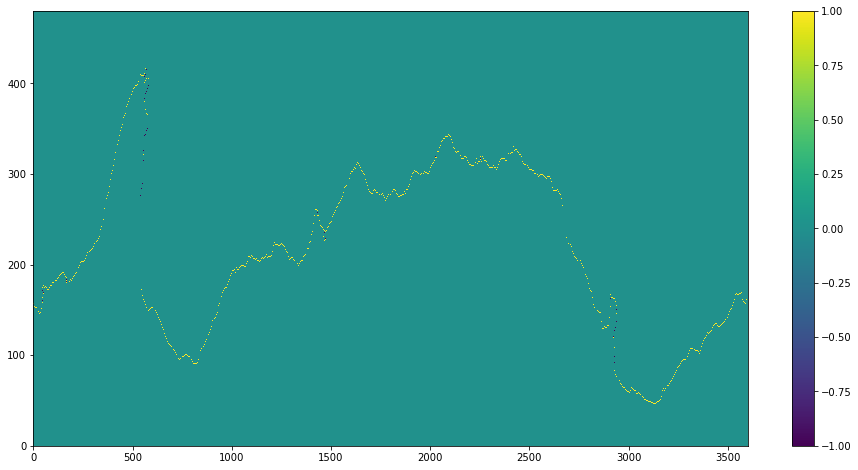

In [51]:
plt.figure(1, figsize=(16, 8))

plt.pcolormesh(mask_y_transport)
plt.colorbar();

In [52]:
# Convert contour masks to data arrays, so we can multiply them later.
# We need to ensure the lat lon coordinates correspond to the actual data location:
#       The y masks are used for ty_trans, so like vhrho this should have dimensions (yu_ocean, xt_ocean).
#       The x masks are used for tx_trans, so like uhrho this should have dimensions (yt_ocean, xu_ocean).
#       However the actual name will always be simply y_ocean/x_ocean irrespective of the variable
#       to make concatenation of transports in both direction and sorting possible.

mask_x_transport = xr.DataArray(mask_x_transport, coords = [tlat[:480], ulon], dims = ['y_ocean','x_ocean'])
mask_y_transport = xr.DataArray(mask_y_transport, coords = [ulat[:480],tlon], dims = ['y_ocean','x_ocean'])
mask_x_transport_numbered = xr.DataArray(mask_x_transport_numbered, coords = [tlat[:480], ulon], dims = ['y_ocean','x_ocean'])
mask_y_transport_numbered = xr.DataArray(mask_y_transport_numbered, coords = [ulat[:480], tlon], dims = ['y_ocean','x_ocean'])

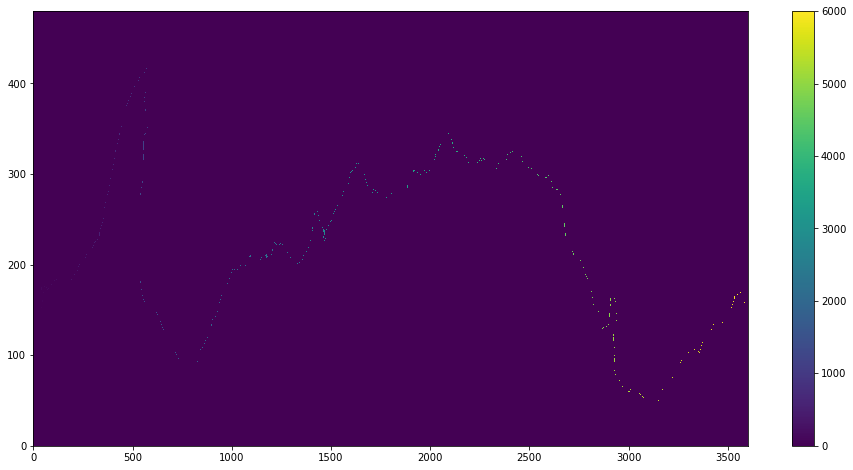

In [53]:
plt.figure(1, figsize=(16, 8))

plt.pcolormesh(mask_x_transport_numbered)
plt.colorbar();

In [54]:
mask_x_transport.shape

(480, 3600)

In [55]:
mask_x_transport_numbered.shape

(480, 3600)

In [56]:
mask_y_transport_numbered.shape

(480, 3600)

In [57]:
# Create the contour order data-array. Note that in this procedure the x-grid counts have x-grid
#   dimensions and the y-grid counts have y-grid dimensions, but these are implicit, the dimension
#   *names* are kept general across the counts, the generic y_ocean, x_ocean, so that concatening works
#   but we dont double up with numerous counts for one lat/lon point.

# stack contour data into 1d:
mask_x_numbered_1d2 = mask_x_transport_numbered.stack(contour_index = ['y_ocean', 'x_ocean'])
mask_x_numbered_1d = mask_x_numbered_1d2.where(mask_x_numbered_1d2 > 0, drop = True)

mask_y_numbered_1d2 = mask_y_transport_numbered.stack(contour_index = ['y_ocean', 'x_ocean'])
mask_y_numbered_1d = mask_y_numbered_1d2.where(mask_y_numbered_1d2 > 0, drop = True)

contour_ordering = xr.concat((mask_x_numbered_1d, mask_y_numbered_1d), dim = 'contour_index')
contour_ordering = contour_ordering.sortby(contour_ordering)
contour_index_array = np.arange(1, len(contour_ordering)+1)

In [58]:
mask_x_numbered_1d.shape

(2080,)

In [59]:
1016+1016+48

2080

In [60]:
data123 = np.load('/home/dxl/TRY/speed1850-60.npy')
U = data123
V = np.load('/home/dxl/TRY/speed1850-60V.npy')


In [61]:
U[U>100000]=np.nan
V[V>100000]=np.nan

In [62]:
data222['UVEL'][0,:,:480,:] = U[:,:480,:]
data222['VVEL'][0,:,:480,:] = V[:,:480,:]

In [63]:
# select latitude range:
tx_trans = data222['UVEL'][0,:,:480,:]*data222['DXU'][:480,:]*data222['dz']/1000000  ##unit is m3/s
ty_trans = data222['VVEL'][0,:,:480,:]*data222['DYU'][:480,:]*data222['dz']/1000000 
    
ty_trans = ty_trans.rename({'nlat': 'y_ocean', 'nlon': 'x_ocean'})
tx_trans = tx_trans.rename({'nlat': 'y_ocean', 'nlon': 'x_ocean'})

In [64]:
data222['DXU'][:300,0]/100

<xarray.DataArray 'DXU' (nlat: 300)>
array([-1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
...
        3.95630987e+03,  3.96397253e+03,  3.97163304e+03,  3.97929139e+03,
        3.98694757e+03,  3.99460158e+03,  4.00225342e+03,  4.00990308e+03,
        4.01755056e+03,  4.02519586e+03,  4.03283896e+03,  4.04047987e+03,
        4.04811858e+03,  4.05575509e+03,  4.06338939e+03,  4.07102148e+03,
        4.07865136e+03,  4.08627902e+03,  4.09390445e+03,  4.10152766e+03,
        4.10914864e+03,  4.11676738e+03,  4.12438388e+03,  4.13199813e+03,
        4.13961014e+03,  4.14721990e+03,  4.15482740e+03,  4.16243264e+03,
        4.17003561e+03,  4.17763632e+03,  4.18523475e+03,  4.19283091e+03,
        4.20042478e+03,  4.20801637e+03,  4.21560567e+03,  4.22319268e+03,
        4.23077738e+03,  4.23835979e+03,  4.24593989e+03,  4.25351768e+03,
        4.26109316e+03,  4.26866632e+03,  4.27623715e+03,  4.28380566e+03,
        4.29137184e+03,  4.29893569e+03,  4.30649719e+03,  4.31405635e+03,
        4.32161317e+03,  4.32916763e+03,  4.33671974e+03,  4.34426949e+03,
        4.35181687e+03,  4.35936189e+03,  4.36690454e+03,  4.37444481e+03,
        4.38198270e+03,  4.38951820e+03,  4.39705132e+03,  4.40458205e+03,
        4.41211038e+03,  4.41963630e+03,  4.42715983e+03,  4.43468094e+03,
        4.44219965e+03,  4.44971593e+03,  4.45722980e+03,  4.46474124e+03,
        4.47225025e+03,  4.47975682e+03,  4.48726096e+03,  4.49476266e+03,
        4.50226192e+03,  4.50975872e+03,  4.51725307e+03,  4.52474496e+03,
        4.53223439e+03,  4.53972136e+03,  4.54720585e+03,  4.55468787e+03])
Coordinates:
    ULONG    (nlat) float64 ...
    ULAT     (nlat) float64 ...
    TLONG    (nlat) float64 ...
    TLAT     (nlat) float64 ...
Dimensions without coordinates: nlat

In [65]:
data222['DYU'][:300,0]/100

<xarray.DataArray 'DYU' (nlat: 300)>
array([-1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
       -1.00000000e-02, -1.00000000e-02, -1.00000000e-02, -1.00000000e-02,
...
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03,
        4.69856305e+03,  4.69856305e+03,  4.69856305e+03,  4.69856305e+03])
Coordinates:
    ULONG    (nlat) float64 ...
    ULAT     (nlat) float64 ...
    TLONG    (nlat) float64 ...
    TLAT     (nlat) float64 ...
Dimensions without coordinates: nlat

In [66]:
ρ0 = 1035 # kg/m^3

ty_trans = ty_trans * mask_y_transport / ρ0 # convert to Sv
tx_trans = tx_trans * mask_x_transport / ρ0 # convert to Sv

In [67]:
mask_y_transport.shape


(480, 3600)

In [68]:
ty_trans.shape

(62, 480, 3600)

In [69]:
## We could also loop in time if we didn't want the time average. Initialise a data array and fill in data by looping in time.

# stack transports into 1d and drop any points not on contour:
x_transport_1d = tx_trans.stack(contour_index = ['y_ocean', 'x_ocean'])
x_transport_1d = x_transport_1d.where(mask_x_numbered_1d2>0, drop = True)
y_transport_1d = ty_trans.stack(contour_index = ['y_ocean', 'x_ocean'])
y_transport_1d = y_transport_1d.where(mask_y_numbered_1d2>0, drop = True)

In [70]:
x_transport_1d.contour_index[1000]

<xarray.DataArray 'contour_index' ()>
array((-69.00621499319598, 11.6), dtype=object)
Coordinates:
    time           object 0313-09-01 00:00:00
    ULONG          float64 11.6
    ULAT           float64 -68.99
    TLONG          float64 11.55
    TLAT           float64 -69.01
    contour_index  object (-69.00621499319598, 11.6)

In [71]:
y_transport_1d.contour_index[1000]

<xarray.DataArray 'contour_index' ()>
array((-72.23923739818653, 184.05000000000004), dtype=object)
Coordinates:
    time           object 0313-09-01 00:00:00
    ULONG          float64 -175.9
    ULAT           float64 -72.24
    TLONG          float64 184.1
    TLAT           float64 -72.26
    contour_index  object (-72.23923739818653, 184.05000000000004)

In [72]:
x_transport_1d = x_transport_1d.sortby(contour_ordering)

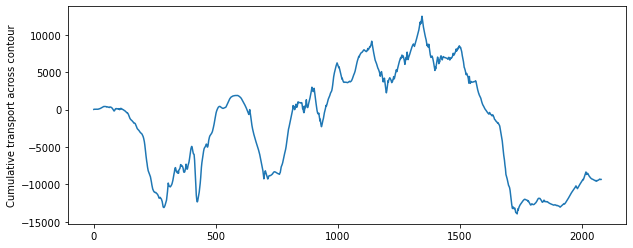

In [73]:
fig, ax = plt.subplots(figsize = (10, 4))

plt.plot(x_transport_1d.sum('z_t').cumsum('contour_index'))
ax.set_ylabel('Cumulative transport across contour');

In [74]:
y_transport_1d = y_transport_1d.sortby(contour_ordering)

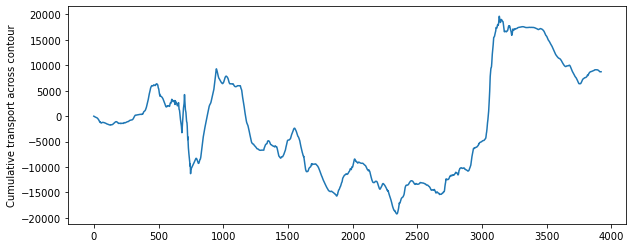

In [75]:
fig, ax = plt.subplots(figsize = (10, 4))
plt.plot(y_transport_1d.sum('z_t').cumsum('contour_index'))

#plt.plot(x_transport_1d.sum('z_t').cumsum('contour_index'))
ax.set_ylabel('Cumulative transport across contour');

In [76]:
# combine all points on contour:
vol_trans_across_contour = xr.concat((x_transport_1d, y_transport_1d), dim = 'contour_index')

vol_trans_across_contour = vol_trans_across_contour.sortby(contour_ordering)
vol_trans_across_contour.coords['contour_index'] = contour_index_array

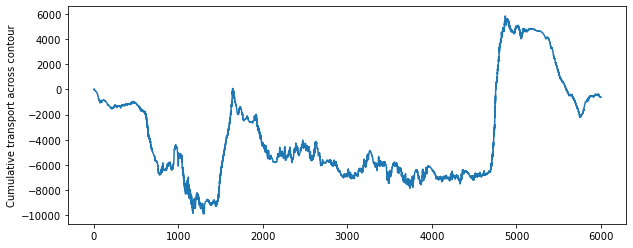

In [77]:
fig, ax = plt.subplots(figsize = (10, 4))

plt.plot(vol_trans_across_contour.sum('z_t').cumsum('contour_index'))
ax.set_ylabel('Cumulative transport across contour');

In [78]:
contour_ordering = xr.concat((mask_x_numbered_1d,mask_y_numbered_1d), dim = 'contour_index')
contour_ordering = contour_ordering.sortby(contour_ordering)

# get lat and lon along contour, useful for plotting later:
lat_along_contour = contour_ordering.y_ocean
lon_along_contour = contour_ordering.x_ocean

contour_index_array = np.arange(1, len(contour_ordering)+1)

# don't need the multi-index anymore, replace with contour count and save
lat_along_contour.coords['contour_index'] = contour_index_array
lon_along_contour.coords['contour_index'] = contour_index_array

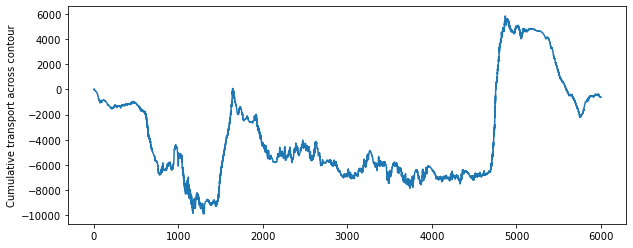

In [79]:
fig, ax = plt.subplots(figsize = (10, 4))

plt.plot(vol_trans_across_contour.sum('z_t').cumsum('contour_index'))
ax.set_ylabel('Cumulative transport across contour');

In [80]:
vol_trans_across_contour.TLONG

<xarray.DataArray 'TLONG' (contour_index: 6002)>
array([250.05, 250.15, 250.05, ..., 249.85, 249.95, 249.85])
Coordinates:
  * contour_index  (contour_index) int64 1 2 3 4 5 ... 5998 5999 6000 6001 6002
    time           object 0313-09-01 00:00:00
    ULONG          (contour_index) float64 -109.9 -109.8 ... -110.0 -110.1
    ULAT           (contour_index) float64 -71.65 -71.69 ... -71.65 -71.61
    TLONG          (contour_index) float64 250.0 250.2 250.0 ... 249.9 249.8
    TLAT           (contour_index) float64 -71.67 -71.71 ... -71.67 -71.63
Attributes:
    long_name:  array of t-grid longitudes
    units:      degrees_east

In [81]:
AAA = vol_trans_across_contour.sum('contour_index')

In [82]:
AAA.shape

(62,)

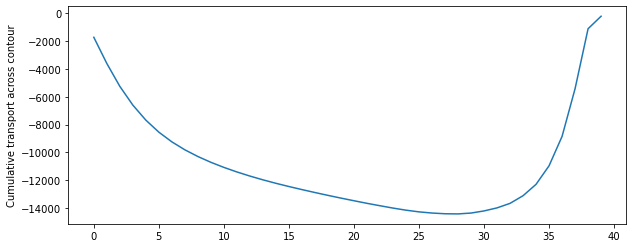

In [83]:
fig, ax = plt.subplots(figsize = (10, 4))

plt.plot(AAA.cumsum('z_t')[:40])
ax.set_ylabel('Cumulative transport across contour');

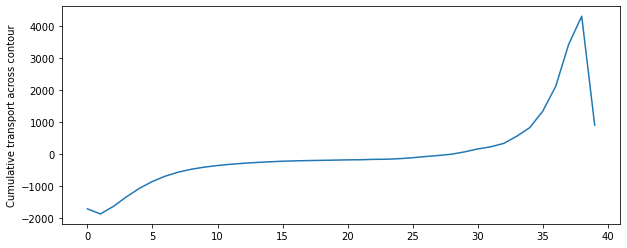

In [84]:
fig, ax = plt.subplots(figsize = (10, 4))

plt.plot(AAA[:40])
ax.set_ylabel('Cumulative transport across contour');

In [85]:
BBB = x_transport_1d.sum('contour_index') + y_transport_1d.sum('contour_index')

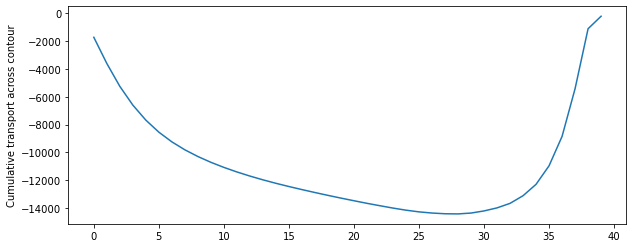

In [86]:
fig, ax = plt.subplots(figsize = (10, 4))

plt.plot(BBB.cumsum('z_t')[:40])
ax.set_ylabel('Cumulative transport across contour');

In [87]:
from matplotlib import gridspec
import matplotlib.colors as col
import matplotlib.path as mpath

vol_trans_across_contour

In [88]:
isobath_ordering  =contour_ordering
#### GET LAT AND LON ALONG ISOBATH
## since the metadata is retain it is incredibly easy to extract lat/lon along isobath
lat_along_isobath = isobath_ordering.y_ocean
lon_along_isobath = isobath_ordering.x_ocean
#isobath_index_array = np.arange(1,6003)


In [89]:
TEMP= data222['TEMP'][0,:,:480,:] ## k Index of Deepest Grid Cell on U Grid
SALT= data222['SALT'][0,:,:480,:] ## water depth on U grid, m
z_t = data222['z_t'][:]/100 ## unit in m

In [90]:
################################
#### GET TEMP ALONG ISOBATH ####
################################
temp_x_transport = xr.DataArray(TEMP, coords = [z_t,tlat[:480], ulon], dims = ['z_t','y_ocean','x_ocean'])
temp_y_transport = xr.DataArray(TEMP, coords = [z_t,ulat[:480],tlon], dims = ['z_t','y_ocean','x_ocean'])


temp_x_transport =temp_x_transport.stack(contour_index = ['y_ocean', 'x_ocean'])
temp_x_transport = temp_x_transport.where(mask_x_numbered_1d2 > 0, drop = True)

temp_y_transport = temp_y_transport.stack(contour_index = ['y_ocean', 'x_ocean'])
temp_y_transport = temp_y_transport.where(mask_y_numbered_1d2 > 0, drop = True)

tempisobath_ordering = xr.concat((temp_x_transport, temp_y_transport), dim = 'contour_index')
tempisobath_ordering = tempisobath_ordering.sortby(isobath_ordering)

In [91]:
################################
#### GET SALT ALONG ISOBATH ####
################################
salt_x_transport = xr.DataArray(SALT, coords = [z_t,tlat[:480], ulon], dims = ['z_t','y_ocean','x_ocean'])
salt_y_transport = xr.DataArray(SALT, coords = [z_t,ulat[:480],tlon], dims = ['z_t','y_ocean','x_ocean'])


salt_x_transport = salt_x_transport.stack(contour_index = ['y_ocean', 'x_ocean'])
salt_x_transport = salt_x_transport.where(mask_x_numbered_1d2 > 0, drop = True)

salt_y_transport = salt_y_transport.stack(contour_index = ['y_ocean', 'x_ocean'])
salt_y_transport = salt_y_transport.where(mask_y_numbered_1d2 > 0, drop = True)

saltisobath_ordering = xr.concat((salt_x_transport, salt_y_transport), dim = 'contour_index')
saltisobath_ordering = saltisobath_ordering.sortby(isobath_ordering)

In [92]:
from gsw import SA_from_SP, p_from_z, CT_from_pt, sigma1
#### CONVERT TEMP/SAL FROM PT/PSU TO CT/AS UNITS
depth = -z_t
depth = xr.DataArray(depth, coords = [z_t], dims = ['z_t'])
depth_along_isobath = (saltisobath_ordering[:,:]*0+1)*depth

print('compute pressure_along_isobath (numpy function)')
#pressure_along_isobath = p_from_z(depth_along_isobath,isobath_ordering)
pressure_along_isobath = xr.DataArray(p_from_z(depth_along_isobath,isobath_ordering), 
                                      coords = [z_t,saltisobath_ordering.contour_index[:]], 
                                      dims = ['z_t','contour_index'], 
                                      name = 'pressure', attrs = {'units':'dbar'})                                   

print('pressure_along_isobath computed')


########### Absolute Salinity from Practical Salinity
#salt_along_isobath = SA_from_SP(saltisobath_ordering,pressure_along_isobath,
                                           # 4,4)
salt_along_isobath = xr.DataArray(SA_from_SP(saltisobath_ordering,pressure_along_isobath,
                                             lon_along_isobath,lat_along_isobath), 
                                  coords = [z_t,saltisobath_ordering.contour_index[:]], 
                                  dims = ['z_t','contour_index'], 
                                  name = 'Absolute salinity', 
                                  attrs = {'units':'Absolute Salinity (g/kg)'})

#ds_salt_along_isobath = xr.Dataset({'salt_along_isobath': salt_along_isobath})
#ds_salt_along_isobath.to_netcdf(save_dir+'salt_along_isobath_AS_9091_65.nc')

#del ds_salt_along_isobath

compute pressure_along_isobath (numpy function)
pressure_along_isobath computed


In [93]:
############# Conservative Temperature from potential temperature
temp_along_isobath = xr.DataArray(CT_from_pt(salt_along_isobath,tempisobath_ordering), 
                                  coords = [z_t,saltisobath_ordering.contour_index[:]], 
                                  dims = ['z_t','contour_index'],  
                                  name = 'Conservative temperature', 
                                  attrs = {'units':'Conservative Temperature (C)'})
ds_temp_along_isobath = xr.Dataset({'_temp_along_isobath': temp_along_isobath})
#ds_temp_along_isobath.to_netcdf(save_dir+'temp_along_isobath_CT_9091_65.nc')

#del ds_temp_along_isobath

print('temp_along_isobath (CT) computed and saved')

temp_along_isobath (CT) computed and saved


In [94]:
sigma1_along_isobath = xr.DataArray(sigma1(salt_along_isobath,temp_along_isobath),
                                     coords = [z_t, saltisobath_ordering.contour_index[:]], 
                                    dims = ['z_t', 'contour_index'], 
                                     name = 'potential density ref 1000dbar', 
                                    attrs = {'units':'kg/m^3 (-1000 kg/m^3)'})

#ds_sigma1_along_isobath = xr.Dataset({'sigma1_along_isobath': sigma1_along_isobath})
#ds_sigma1_along_isobath.to_netcdf(save_dir+'sigma1_along_isobath_9091_65.nc')

#del ds_sigma1_along_isobath, salt_along_isobath, temp_along_isobath

print('sigma1_along_isobath computed')

sigma1_along_isobath computed


In [95]:
sigma1_along_isobath = sigma1_along_isobath.sortby(isobath_ordering)

In [96]:
np.nanmin(sigma1_along_isobath)

31.880074877250536

In [97]:
np.nanmax(sigma1_along_isobath)

32.91369597108769

In [98]:
isopycnal_bins_sigma1 = np.arange(np.nanmin(sigma1_along_isobath),np.nanmax(sigma1_along_isobath)+0.01,0.01)

In [99]:

## intialise empty transport along isobath in density bins array
vol_trans_across_contour = xr.DataArray(vol_trans_across_contour, 
                                               coords = [z_t, saltisobath_ordering.contour_index[:]], 
                                               dims = ['z_t', 'contour_index'], 
                                               name = 'vol_trans_across_contour_binned')


In [100]:
## intialise empty transport along isobath in density bins array
vol_trans_across_isobath_binned = xr.DataArray(np.zeros((len(isopycnal_bins_sigma1),6002)), 
                                               coords = [isopycnal_bins_sigma1, saltisobath_ordering.contour_index[:]], 
                                               dims = ['isopycnal_bins', 'contour_index'], 
                                               name = 'vol_trans_across_contour_binned')

In [101]:
for i in range(len(isopycnal_bins_sigma1)-1):
    bin_mask = sigma1_along_isobath.where(sigma1_along_isobath<=isopycnal_bins_sigma1[i+1]).where(sigma1_along_isobath>isopycnal_bins_sigma1[i])*0+1
    bin_fractions = (isopycnal_bins_sigma1[i+1]-sigma1_along_isobath * bin_mask)/(isopycnal_bins_sigma1[i+1]-isopycnal_bins_sigma1[i])
    ## transport
    vol_trans_across_contour_in_sigmalower_bin = (vol_trans_across_contour * bin_mask * bin_fractions).sum(dim = 'z_t')
    vol_trans_across_isobath_binned[i,:] += vol_trans_across_contour_in_sigmalower_bin.fillna(0)
    #del transport_across_isobath_in_sigmalower_bin
    vol_trans_across_contour_in_sigmaupper_bin = (vol_trans_across_contour * bin_mask * (1-bin_fractions)).sum(dim = 'z_t')
    vol_trans_across_isobath_binned[i+1,:] += vol_trans_across_contour_in_sigmaupper_bin.fillna(0)
    #del bin_mask, bin_fractions, transport_across_isobath_in_sigmaupper_bin
    #print(i)

print('Start vol_trans_across_isobath_binned.load()')
#vol_trans_across_isobath_binned = vol_trans_across_isobath_binned.load()
#ds_vol_trans_across_isobath_binned = xr.Dataset({'vol_trans_across_isobath_binned': vol_trans_across_isobath_binned})
#ds_vol_trans_across_isobath_binned.to_netcdf(save_dir+'vol_trans_across_isobath_binned_9091_65.nc')
#del vol_trans_across_isobath_binned, ds_vol_trans_across_isobath_binned, vol_trans_across_isobath

Start vol_trans_across_isobath_binned.load()


In [102]:
#net_offshore_trans_8485 = vol_trans_across_isobath_binned.sum('contour_index')

#net_offshore_trans_8485 = net_offshore_trans_8485.values
#net_offshore_trans_8485 = np.cumsum(net_offshore_trans_8485)* 1e-3

In [103]:
net_offshore_trans_8485 = vol_trans_across_isobath_binned.sum('contour_index')
net_offshore_trans_8485 = net_offshore_trans_8485.values
net_offshore_trans_8485 = np.cumsum(net_offshore_trans_8485[::-1])[::-1]* 1e-3

In [104]:
## what are the dense water mass cutoffs?
isopycnal_bins = vol_trans_across_isobath_binned.isopycnal_bins
DSW_8485_density = isopycnal_bins[np.argmax(net_offshore_trans_8485)]
DSW_8485_bin = np.argmax(net_offshore_trans_8485)
print(DSW_8485_density.values)
print(DSW_8485_bin)

32.56007487725064
68


In [105]:
vol_trans_across_isobath_binned

<xarray.DataArray 'vol_trans_across_contour_binned' (isopycnal_bins: 105, contour_index: 6002)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * isopycnal_bins  (isopycnal_bins) float64 31.88 31.89 31.9 ... 32.91 32.92
  * contour_index   (contour_index) MultiIndex
  - y_ocean         (contour_index) float64 -71.65 -71.69 ... -71.65 -71.63
  - x_ocean         (contour_index) float64 250.1 250.2 -109.9 ... 249.9 -110.1

In [106]:
DSW_trans = vol_trans_across_isobath_binned.sel(isopycnal_bins = slice(DSW_8485_density,None)).sum(dim = 'isopycnal_bins').cumsum(dim = 'contour_index').load()/1e3
CDW_trans = vol_trans_across_isobath_binned.sel(isopycnal_bins = slice(32.37,DSW_8485_density)).sum(dim = 'isopycnal_bins').cumsum(dim = 'contour_index').load()/1e3
AASW_trans = vol_trans_across_isobath_binned.sel(isopycnal_bins = slice(None,32.37)).sum(dim = 'isopycnal_bins').cumsum(dim = 'contour_index').load()/1e3
total_trans = vol_trans_across_isobath_binned.sum(dim = 'isopycnal_bins').cumsum(dim = 'contour_index').load()/1e3

In [107]:
DSW_trans2 = vol_trans_across_isobath_binned.sel(isopycnal_bins = slice(32.55,None)).sum(dim = 'isopycnal_bins').load()/1e3
CDW_trans2 = vol_trans_across_isobath_binned.sel(isopycnal_bins = slice(32.37,32.55)).sum(dim = 'isopycnal_bins').load()/1e3
AASW_trans2 = vol_trans_across_isobath_binned.sel(isopycnal_bins = slice(None,32.37)).sum(dim = 'isopycnal_bins').load()/1e3
total_trans2 = vol_trans_across_isobath_binned.sum(dim = 'isopycnal_bins').load()/1e3

In [108]:
DSW_trans2

<xarray.DataArray 'vol_trans_across_contour_binned' (contour_index: 6002)>
array([-0.00058193, -0.00292288,  0.00502303, ...,  0.00055761,
        0.00040699,  0.00292337])
Coordinates:
  * contour_index  (contour_index) MultiIndex
  - y_ocean        (contour_index) float64 -71.65 -71.69 ... -71.65 -71.63
  - x_ocean        (contour_index) float64 250.1 250.2 -109.9 ... 249.9 -110.1

In [124]:
def offshore_transport_sum(ax):
    ax.plot(net_offshore_trans_8485,isopycnal_bins_sigma1,color = 'k', linewidth = 2, label = 'Control')
    ax.set_ylabel(r'$\sigma_{1}$ (kg m$^{-3}$)', fontsize = 28)
    ax.set_xlabel(r'Offshore transport (Sv)', fontsize = 28)
    ax.plot([0,0],[31.8,32.8],'k',linewidth=0.5, alpha = 0.5)
    ax.plot([-2,16],[DSW_8485_density, DSW_8485_density],'k',linewidth=0.5)
    ax.plot([-2,16],[32.37, 32.37],'k',linewidth=0.5)
    #ax.set_xlim((-0.5,11))
    #ax.set_ylim((np.nanmax(sigma1_along_isobath)+0.01,np.nanmin(sigma1_along_isobath)))
    ax.set_xticks([0,2,4,6,8,10])
    ax.set_xticklabels([0,2,4,6,8,10],fontsize = 28)
    ax.text(9,32.7, 'DSW', fontsize = 28, color = 'purple')
    ax.text(9,32.45, 'CDW', fontsize = 28, color = 'tomato')    
    ax.text(8.4,32.3, 'AASW', fontsize = 28, color = 'royalblue') 
    #x.set_xticklabels(fontsize = 28)

In [125]:
def offshore_transport(ax):
    #ax.fill_between([698,1850],[-8.2,-8.2],[11.7,11.7], color = 'silver', alpha = 0.25)
    #ax.fill_between([3460,4300],[-8.2,-8.2],[11.7,11.7], color = 'silver', alpha = 0.25)
    #ax.fill_between([5524,5850],[-8.2,-8.2],[11.7,11.7], color = 'silver', alpha = 0.25)

    #ax.plot(total_trans2, color = 'k', linewidth = 1,label = 'Total')
    ax.plot(AASW_trans, color = 'royalblue', linewidth = 2,label = 'AASW')
    ax.plot(CDW_trans, color = 'tomato', linewidth = 2,label = 'CDW')
    ax.plot(DSW_trans, color = 'purple', linewidth = 2,label = 'DSW')

    ax.set_ylabel('Offshore transport (Sv)', fontsize = 28)
    ax.set_xlabel('Isobath Index', fontsize = 28)
    ax.plot([0,contour_index_array[-1]],[0,0],'gray',linewidth=0.5)


    ax.set_xlim((0,contour_index_array[-1]))
    #ax.set_yticks([-8,-6,-4,-2,0,2,4,6,8,10])
    #ax.set_ylim((-8.2,11.2))
    ax.legend(loc=2, fontsize = 24)
    ax.set_xticks([0,1000,2000,3000,4000,5000,6000])
    ax.set_xticklabels(['250','306','348','53','120','184','245'], fontsize = 28)

In [130]:
def offshore_transport(ax):
    #ax.fill_between([698,1850],[-8.2,-8.2],[11.7,11.7], color = 'silver', alpha = 0.25)
    #ax.fill_between([3460,4300],[-8.2,-8.2],[11.7,11.7], color = 'silver', alpha = 0.25)
    #ax.fill_between([5524,5850],[-8.2,-8.2],[11.7,11.7], color = 'silver', alpha = 0.25)

    #ax.plot(total_trans2, color = 'k', linewidth = 1,label = 'Total')
    ax.plot(resultAASW_trans2, color = 'royalblue', linewidth = 2,label = 'AASW')
    ax.plot(resultCDW_trans2, color = 'tomato', linewidth = 2,label = 'CDW')
    ax.plot(resultDSW_trans2, color = 'purple', linewidth = 2,label = 'DSW')

    ax.set_ylabel('Offshore transport (Sv)', fontsize = 28)
    ax.set_xlabel('Isobath Index', fontsize = 28)
    ax.plot([0,contour_index_array[-1]],[0,0],'gray',linewidth=0.5)


    ax.set_xlim((0,contour_index_array[-1]))
    #ax.set_yticks([-8,-6,-4,-2,0,2,4,6,8,10])
    #ax.set_ylim((-8.2,11.2))
    ax.legend(loc=2, fontsize = 24)
    ax.set_xticks([0,1000,2000,3000,4000,5000,6000])
    ax.set_xticklabels(['250','306','348','53','120','184','245'], fontsize = 28)

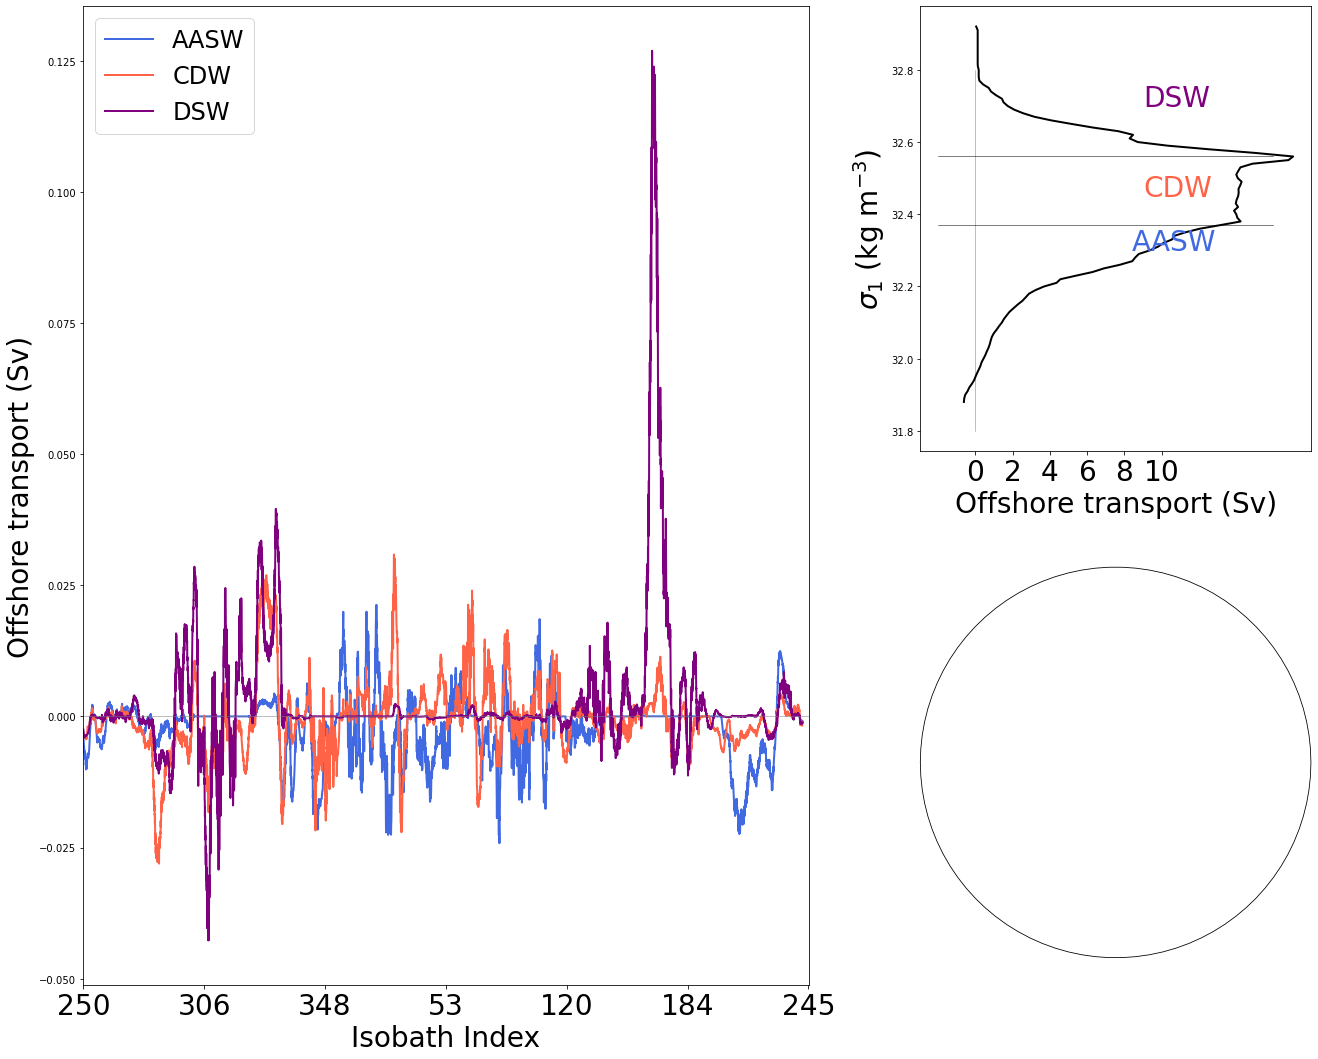

In [131]:
import cartopy.crs as ccrs
fig = plt.figure(num=1,figsize=(22,18))
gs = gridspec.GridSpec(2,2, width_ratios=[13,7]) 
ax0, ax1, ax2 = plt.subplot(gs[:,0]), plt.subplot(gs[0,1]), plt.subplot(gs[1,1],projection=ccrs.SouthPolarStereo())
# gs.update(hspace = 0.4)
offshore_transport(ax0)
offshore_transport_sum(ax1)
#isobath_index_map(ax2)
#plt.show()
plt.savefig("DSW2.png",bbox_inches='tight')

In [112]:
window_size = 50

In [113]:
resultAASW_trans2 = []
for i in range(len(AASW_trans2) - window_size + 1):
    window = AASW_trans2[i : i + window_size]
    window_average = sum(window) / window_size
    resultAASW_trans2.append(window_average)

In [114]:
resultCDW_trans2 = []
for i in range(len(CDW_trans2) - window_size + 1):
    window = CDW_trans2[i : i + window_size]
    window_average = sum(window) / window_size
    resultCDW_trans2.append(window_average)

In [115]:
resultDSW_trans2 = []
for i in range(len(DSW_trans2) - window_size + 1):
    window = DSW_trans2[i : i + window_size]
    window_average = sum(window) / window_size
    resultDSW_trans2.append(window_average)